<a href="https://colab.research.google.com/github/SJinLee/PPG/blob/main/04.Yurim_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/SJinLee/cryptology/main/YURIM_8min.txt',header=None)

<Axes: >

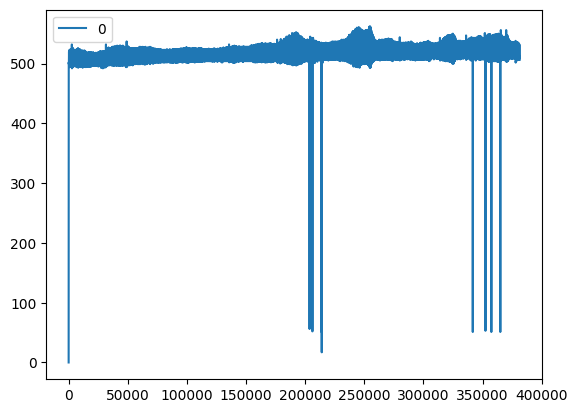

In [4]:
data.plot()

In [64]:
def get_lowpass(ppg):
    ppg2 = ppg.copy()
    d = 0.92
    a = d
    b = 1-d
    xi = ppg2['Red_Signal'].values[1:].astype(float).copy()
    v = ppg2['Red_Signal'].values.astype(float).copy()
    y = v[0]
    i = 1
    for x in xi:
        y += b*(x-y)
        v[i] = y
        i += 1
    ppg2['Red_Signal2'] = v
    ppg2['Time'] = pd.to_datetime(ppg2['Time'])
    return ppg2

In [65]:
data2 = data.rename(columns={0:'Red_Signal'})
data2['Time'] = pd.to_datetime('2024-04-11 00:00:00')+pd.Timedelta(milliseconds=1000/790)*data.index
data3 = get_lowpass(data2)
diff=data3['Red_Signal2'].diff()
data3['peak'] = np.concatenate([[False],(diff.iloc[1:-1].values>0) & (diff.iloc[2:].values<0),[False]])
data3['peak2'] = data3['peak'] & (data3['Red_Signal']>515)

In [66]:
data3

,Red_Signal,Time,Red_Signal2,peak,peak2
0,0,2024-04-11 00:00:00.000000000,0.000000,False,False
1,500,2024-04-11 00:00:00.001265822,40.000000,False,False
2,500,2024-04-11 00:00:00.002531644,76.800000,False,False
3,500,2024-04-11 00:00:00.003797466,110.656000,False,False
4,500,2024-04-11 00:00:00.005063288,141.803520,False,False
...,...,...,...,...,...
381202,506,2024-04-11 00:08:02.533878044,507.397729,False,False
381203,506,2024-04-11 00:08:02.535143866,507.285910,False,False
381204,506,2024-04-11 00:08:02.536409688,507.183037,False,False
381205,506,2024-04-11 00:08:02.537675510,507.088394,False,False


In [67]:
import matplotlib.pyplot as plt
def draw_ppg(ppg2,start,period):
    t = ppg2['Time'][start:start+period]
    x = ppg2['Red_Signal'][start:start+period]
    y = ppg2['Red_Signal2'][start:start+period]
    plt.plot(t,x,label='input')
    plt.plot(t,y,label='output')
    if 'peak2' in ppg2:
        peak = ppg2['peak2'][start:start+period]
        plt.plot(t.loc[peak],y.loc[peak],'og')
    plt.legend()

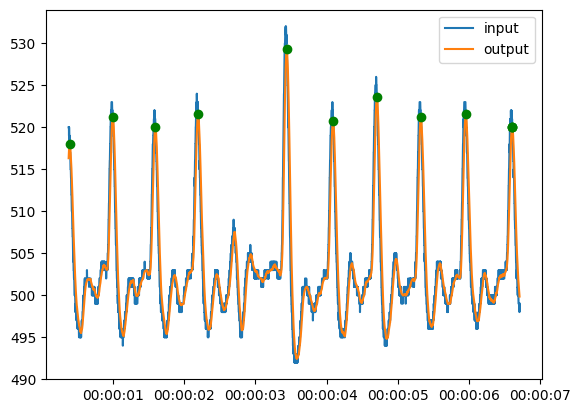

In [70]:
draw_ppg(data3,300,5000)